# Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler

## Data Integration for *Visualization*

In [3]:
db = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
db.drop_duplicates(inplace = True)

In [4]:
scaler = MinMaxScaler()
db[['BMI']] = scaler.fit_transform(db[['BMI']])

In [5]:
subset_no = db[db['Diabetes_012'] == 0].sample(50)
subset_yes = db[db['Diabetes_012'] == 2].sample(50)

new_db = pd.concat([subset_no, subset_yes])
new_db.shape

(100, 22)

## *Visualization* 

In [6]:
features = new_db.drop(columns = ['Diabetes_012'])

x = features.values
y = new_db['Diabetes_012'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [7]:
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

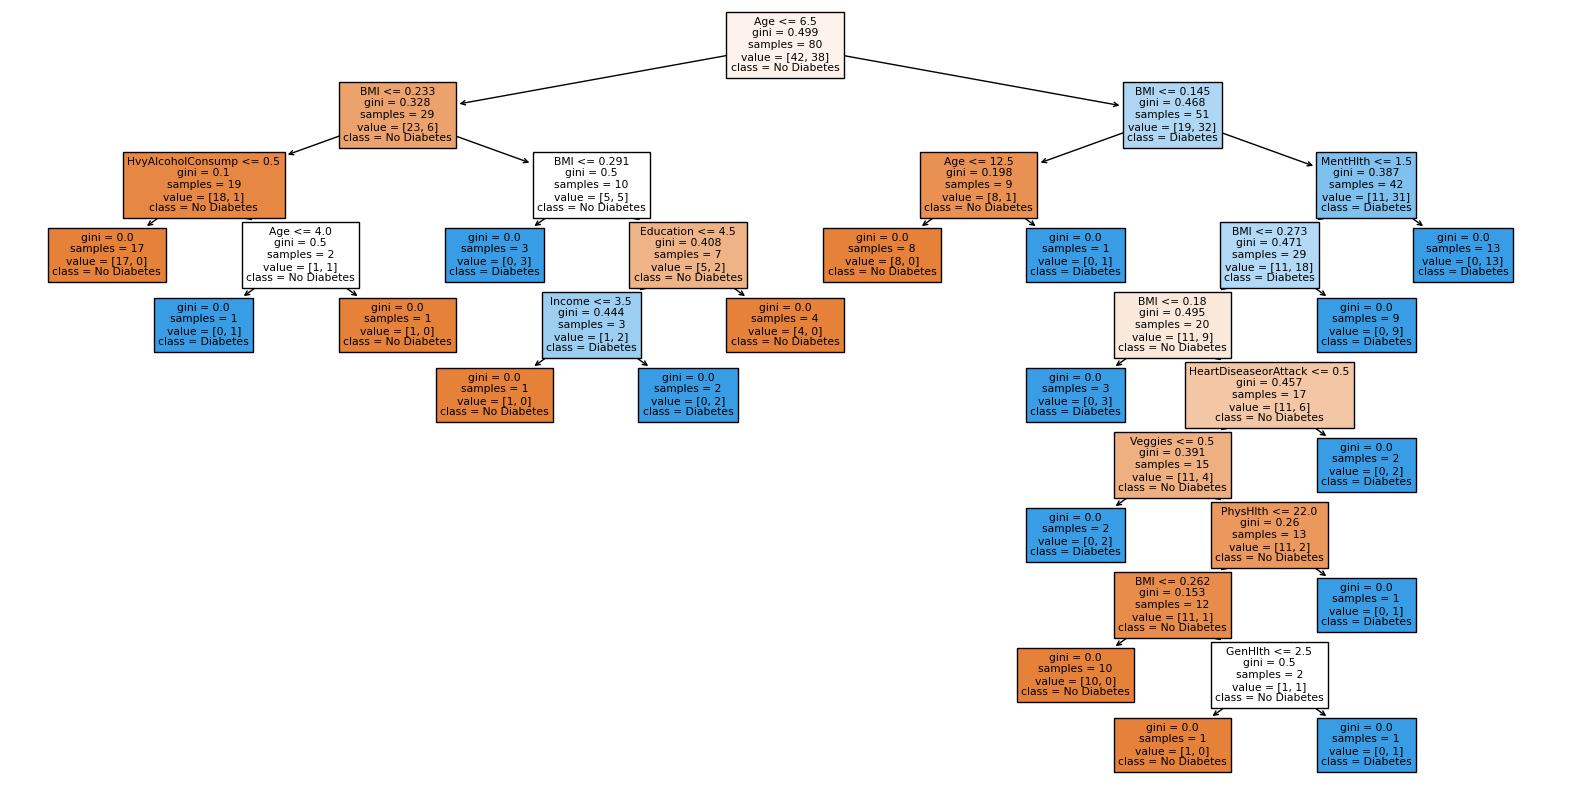

In [8]:
plt.figure(figsize = (20, 10))
plot_tree(clf, filled = True, feature_names = features.columns.tolist(), class_names = ['No Diabetes', 'Diabetes'])
plt.show()

## Data Integration for *Predictors*

In [9]:
db = db[db["Diabetes_012"] != 1] # drop prediabetes
db['Diabetes_012'] = db['Diabetes_012'].replace(2,1)

i_keep_0 = db[db['Diabetes_012'] == 0].sample(n = db['Diabetes_012'].value_counts()[1],
                                   replace=False,
                                   random_state = 1).index

i_keep_all = db[db['Diabetes_012'] == 1].index.append(i_keep_0).sort_values()

db = db.loc[i_keep_all].reset_index(drop=True)

In [10]:
counts = db['Diabetes_012'].value_counts()
print(counts)

0.0    35097
1.0    35097
Name: Diabetes_012, dtype: int64


## Predictors

In [11]:
features = db.drop(columns = ['Diabetes_012'])

x = features.values
y = db['Diabetes_012'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [12]:
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [13]:
feature_importance = clf.feature_importances_
sortfeat = sorted(zip(features.columns, feature_importance), key=lambda x: x[1], reverse=True)

print("Feature Importance (Descending Order):")
for feature, importance in sortfeat:
    print(f"{feature}: {importance}")

Feature Importance (Descending Order):
BMI: 0.13737767479851187
HighBP: 0.13351521803949973
Age: 0.10731610226530384
Income: 0.09034693900266084
GenHlth: 0.08984573927298303
PhysHlth: 0.07341490104911667
Education: 0.06363447020828879
MentHlth: 0.054261415446596066
Fruits: 0.03225099940213488
PhysActivity: 0.028620513054059684
Smoker: 0.028172631549664214
Sex: 0.027618094142411197
Veggies: 0.025975823474093003
HighChol: 0.024231733075406325
DiffWalk: 0.019592488780632415
HeartDiseaseorAttack: 0.018411923821216092
NoDocbcCost: 0.013011613436503864
HvyAlcoholConsump: 0.010133469710987168
Stroke: 0.010013805601083626
AnyHealthcare: 0.007098230717999155
CholCheck: 0.005156213150847449


## Decision Tree Predictors (Top 3):
BMI; HighBP; Age

## EDA:
HighChol

## UI Importance:
Sex

# Decision Tree Model

## Data Integration

In [14]:
db_main = db[['Diabetes_012', 'BMI', 'HighBP', 'HighChol', 'Sex', 'Age']]

In [15]:
features = db_main.drop(columns = ['Diabetes_012'])

x = features.values
y = db_main['Diabetes_012'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [16]:
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=1)

In [17]:
pred = clf.predict(xtest)

accuracy = accuracy_score(ytest, pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

print(f'Training MSE error is: {round(mean_squared_error(clf.predict(xtrain), np.asarray(ytrain).reshape(-1, 1)), 4)}')
print(f'Testing MSE error is: {round(mean_squared_error(pred, np.asarray(ytest).reshape(-1, 1)), 4)}')

Model accuracy: 70.68%
Training MSE error is: 0.2704
Testing MSE error is: 0.2932


In [18]:
print(classification_report(ytest, pred,
                            digits = 4,
                            target_names = ["No Diabetes", "Diabetes"],
                            zero_division = 1))

              precision    recall  f1-score   support

 No Diabetes     0.7301    0.6747    0.7013      3581
    Diabetes     0.6861    0.7403    0.7122      3439

    accuracy                         0.7068      7020
   macro avg     0.7081    0.7075    0.7067      7020
weighted avg     0.7085    0.7068    0.7066      7020



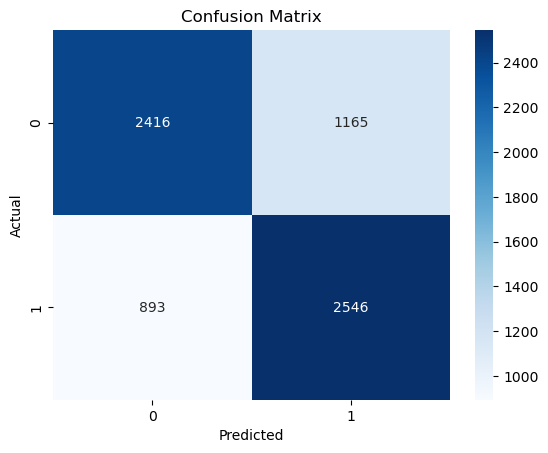

In [19]:
cm = confusion_matrix(ytest, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()